#  Fraudulent Transactions Prediction

## Business Context
_This case requires to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan.
Following usual model development procedures, the model would be estimated on the 
calibration data and tested on the validation data. This case requires both statistical analysis and 
creativity/judgment._

## Dataset
_Data for the case is available in CSV format having 6362620 rows and 10 columns._


## Task:
1. Data cleaning including missing values, outliers and multi-collinearity. 
2. Describe your fraud detection model in elaboration. 
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools. 
5. What are the key factors that predict fraudulent customer? 
6. Do these factors make sense? If yes, How? If not, How not? 
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

### Import required libraries


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

import sklearn
import scipy

## EDA &  Data Pre-Processing

### Load and read the data

In [2]:
# Read the data
df=pd.read_csv('Fraud.csv')


In [3]:
# See data samples from beginning
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
# See data samples from end
df.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Exploratory Data Analysis

   **Data Dictionary:**  

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Check for null values
df.isnull().values.any()

False

No Null values present

In [7]:
# Shape the data
df.shape

(6362620, 11)

The dataset (size:534 mb) is huge.

In [8]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
genuine = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
genuine_percentage = (genuine / (fraud + genuine)) * 100
fraud_percentage = (fraud / (fraud + genuine)) * 100

print("% of genuine transactions: {:.4f} %".format(genuine_percentage))
print("% of Fraud transactions: {:.4f} %".format(fraud_percentage))

% of genuine transactions: 99.8709 %
% of Fraud transactions: 0.1291 %


**Target Variable** is **Highly Imbalanced.**

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Data Visualization

**Distribution of Genuine and fraud Trandactions**

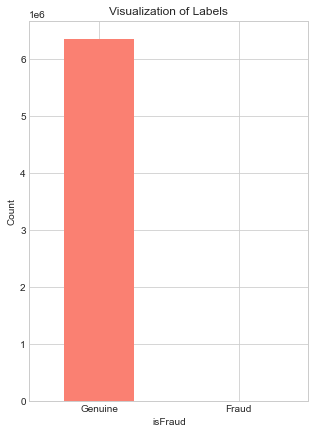

In [11]:
plt.figure(figsize=(5,7))
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0, color='salmon')
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

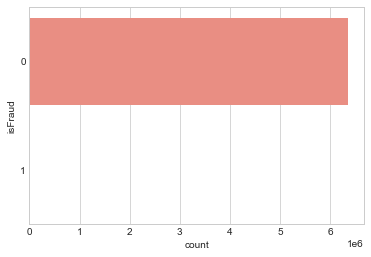

In [12]:
sns.countplot(y = df['isFraud'], color='salmon');

**Feature Correlation HEATMAP**

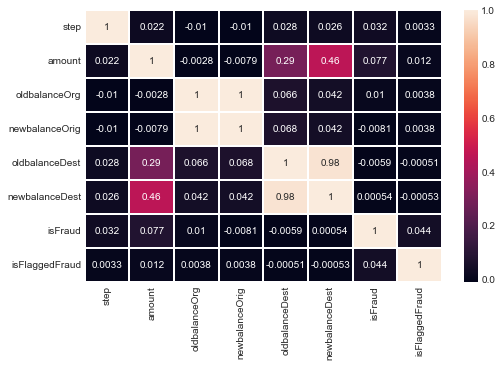

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), cmap='rocket', linewidth=0.2, annot=True);

## Solution

In [14]:
#creating a copy of original dataset to train and test models

df1=df.copy()
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Numerical data**

In [15]:
# Checking how many attributes are numerical
num = df1.select_dtypes(exclude = "object").columns
print (num)

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


**Categorical Data**

In [16]:
# Checking how many attributes are categorical

cat = df1.select_dtypes(include = "object").columns
print (cat)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


**LABEL ENCODING**

There are 3 attributes here which are categorical.   
To chcek **Multicolinearity**: label encode categorical data columns

In [17]:
#Label Encoding for object to numeric conversion

for feat in cat:
    df1[feat] = label.fit_transform(df1[feat].astype(str))

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


In [19]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


#### Detecting Multicollinearity with VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function for Calculating VIF
def vif_cal(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

    return(vif)

vif_cal(df1)

,Feature,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


**From the table for VIF calculation, we can see that:**

|Features|VIF Value|Correlation|  
|:--:|:--:|:--:|
|oldbalanceOrg & newbalanceOrig|Similarly High|High|  
|oldbalanceDest & newbalanceDest|Close to each other|High|  
|nameOrig & nameDest| almost similar|High|

So we can combine these pairs of collinear Features and drop the individual ones.

In [21]:
df1['Actual_amount_orig'] = df1.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df1['Actual_amount_dest'] = df1.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
df1['TransactionPath'] = df1.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df1 = df1.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step','nameOrig','nameDest'],axis=1)

vif_cal(df1)

,Feature,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,Actual_amount_orig,1.307910
5,Actual_amount_dest,3.754335
6,TransactionPath,2.677167


**Normalizing data**

In [25]:
# Scaling 'amount' data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1["NormalizedAmount"] = scaler.fit_transform(df1['amount'].values.reshape(-1, 1))
df1.drop(['amount'], inplace= True, axis= 1)

#### Feature Correlation HEATMAP for modified dataset

<AxesSubplot:>

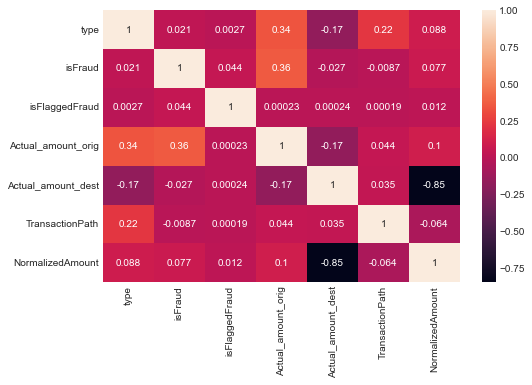

In [27]:
corr=df1.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True)

### Model Building

In [28]:

from sklearn.model_selection import train_test_split

# For Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# For showing Progress Bar
from tqdm.notebook import tqdm

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [29]:
Y = df1["isFraud"]
X = df1.drop(["isFraud"], axis= 1)

#### TRAIN-TEST SPLIT

In [30]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 24)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 6)
Shape of X_test:  (1908786, 6)


### Model and Training - Trial 1

In [31]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [33]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

**EVALUATION for Decision Tree & Random Forest**

In [34]:
# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.92482132622516
Random Forest Score:  99.96013172770546


In [35]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1712
False Positives: 746
True Negatives: 1905639
False Negatives: 689
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1701
False Positives: 61
True Negatives: 1906324
False Negatives: 700


In [36]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)


Confusion Matrix - Decision Tree
[[1905639     746]
 [    689    1712]]


In [37]:
# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Random Forest
[[1906324      61]
 [    700    1701]]


In [38]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906385
           1       0.70      0.71      0.70      2401

    accuracy                           1.00   1908786
   macro avg       0.85      0.86      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906385
           1       0.97      0.71      0.82      2401

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



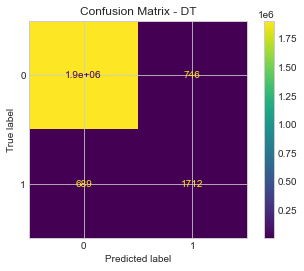

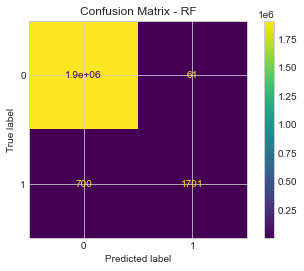

In [39]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

**Comparison of Random Forest and Decision Tree:**   
Here, Decision Tree and Random Forest models -both gives highly accurate results, with Tandom Forest approach beiung slightly better than decision tree.

### Model and Training - Trial 2

In [42]:
N_SPLITS = 2  

lgbm_preds = []
xgb_preds = []
catb_preds = []

prob = []

folds = StratifiedKFold(n_splits=N_SPLITS, shuffle=True)

for fold, (train_id, test_id) in enumerate(tqdm(folds.split(X, Y), total=N_SPLITS)):

    print(f'fold {fold + 1}')

    X_train, Y_train = X.iloc[train_id], Y.iloc[train_id] 
    X_valid, Y_valid = X.iloc[test_id], Y.iloc[test_id]
    
    lgbm_model = lgbm.LGBMClassifier()
    xgb_model  = xgb.XGBClassifier()
    catb_model = catb.CatBoostClassifier(verbose=0)
    
    lgbm_model.fit(X_train, Y_train)
    xgb_model.fit(X_train, Y_train)
    catb_model.fit(X_train, Y_train)
    
    print(f'Training Accuracy   :- {(lgbm_model.score(X_train, Y_train)*100).round(2)}% | {(xgb_model.score(X_train, Y_train)*100).round(2)}% | {(catb_model.score(X_train, Y_train)*100).round(2)}%')
    print(f'Validation Accuracy :- {(lgbm_model.score(X_valid, Y_valid)*100).round(2)}% | {(xgb_model.score(X_valid, Y_valid)*100).round(2)}% | {(catb_model.score(X_valid, Y_valid)*100).round(2)}%')
    
    prob1, prob2, prob3 = lgbm_model.predict_proba(X_test), xgb_model.predict_proba(X_test), catb_model.predict_proba(X_test)
    prob.append((prob1 + prob2 + prob3) / 3)
print('Model Trained !!!')
        

  0%|          | 0/2 [00:00<?, ?it/s]

fold 1
Training Accuracy   :- 99.78% | 99.96% | 99.96%
Validation Accuracy :- 99.78% | 99.96% | 99.96%
fold 2
Training Accuracy   :- 99.86% | 99.96% | 99.97%
Validation Accuracy :- 99.86% | 99.96% | 99.96%
Model Trained !!!


In [44]:
final = [[0,0]]
for i in range(N_SPLITS):
    final = final + prob[i]
    
final = final/N_SPLITS
Y_pred = pd.Series([np.argmax([i]) for i in final])

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Test Accuracy:- {accuracy_score(Y_test, Y_pred)*100}%')

Test Accuracy:- 99.96196535389508%


In [52]:
classification_report = classification_report(Y_test, Y_pred)
print("Classification Report")
print(classification_report)


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906385
           1       0.99      0.71      0.82      2401

    accuracy                           1.00   1908786
   macro avg       0.99      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



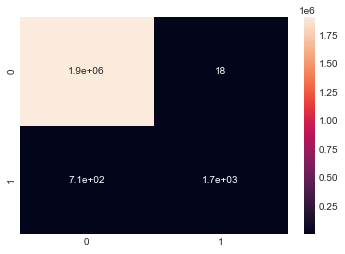

In [50]:
sns.heatmap(confusion_matrix(Y_test, Y_pred), cmap='rocket', annot=True);

The ensemble of XGboost, CatBoost, LGBMClassifier gives higher accuracy than their individual application

## CONCLUSION

From above test, it was found that
- Accuracy of both Random Forest and Decision Tree is almost equal; 
- The precision of Random Forest is more than that of DT. 
- Boosting models like XGboost, CatBoost, LGBMClassifier gives higher accuracy but lesser precision if tested individually. But if they are tested as an ensemble, it gives far better precision score.
- In a fraud detection model, Precision is highly important because we want Fraud transactions to be predicted correctly and Genuine transactions to be left out. 
- If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.


### Reason of choosing this model:

- Highly unbalanced dataset 
- Random forest makes multiple decision trees which makes it easier but it consumed a lot of time to process  



### What are the key factors that predict fraudulent customer?

- The source of request is secured or not ?
- Is the name of organisation asking for money is genuine or not ?
- Transaction history of vendors.


### What kind of prevention should be adopted while company update its infrastructure?

- Use smart vertified apps only.
- Browse through secured websites.
- Use secured internet connections (USE VPN).
- Keep mobile and laptop security updated.
- Don't respond to unsolicited calls/SMS(s/E-mails.
- If one feels like they have been tricked or security compromised, contact the bank immidiately.


### Assuming these actions have been implemented, how would you determine if they work?

- Bank sending E-statements.
- Customers keeping a check of their account activity.
- Always keep a log of your payments activity.